## Cassandra
* This notebook is based on [a youtube class](https://www.youtube.com/watch?v=J-cSy5MeMOA)

### System overview

#### Differentiate between relational databases and an Apache Cassandra database
* Comparison of Cassandra and relational databases
  + Cassandra modeling methodoloty rather than sample relational model lmethodology
  + follows application-model-data rather than data-model-applications
  + queries are king rather than entities are king
  + primary keys are much more than just for uniquness, but impact the performance
  + based on a distributed architecture rather than RDBMS that often have single point of failure
  + based on CAP therorem rather than ACID compliant, doesn't support ACID
    + ACID causes a significant performance penalty, and is not required for many use cases
    + a single Cassandra write operation demonstrates ACID properties 
      + Inserts, Updates and Deletes are atomic, isolated and durable on a single row
      + tunable consistency for data replicated to nodes that can be ajusted on the number of nodes that have to agree to execute a particular read or write command.
      + Does not handle appication integrity constraints
  + Denomarlizeation of data to avoid joins and indexes
    + to make join works, the results of the tables need to be stored in the same location.
    + in distributed databases, the different partitions of data are stored on different nodes
      + join will have negative impact on the performance with the scale of the databases increases and the random distributions become prevalent
      + Cassandra does not support joins but uses denormalization
      + denormalization ensures that all the required information is confined to appropriate table without have to perform joins, as a result
        + duplicate data can exist in multiple tables, which is more cost efficient and allows faster retrieval of data
        + while using Cassandra, developer can decide up front what tables they want their data to be in
        + in the following table design, we have two tables that allow users to access comments by video title or user. The name convention of the table names are comments_by_video, and comments_by_user, respectively
        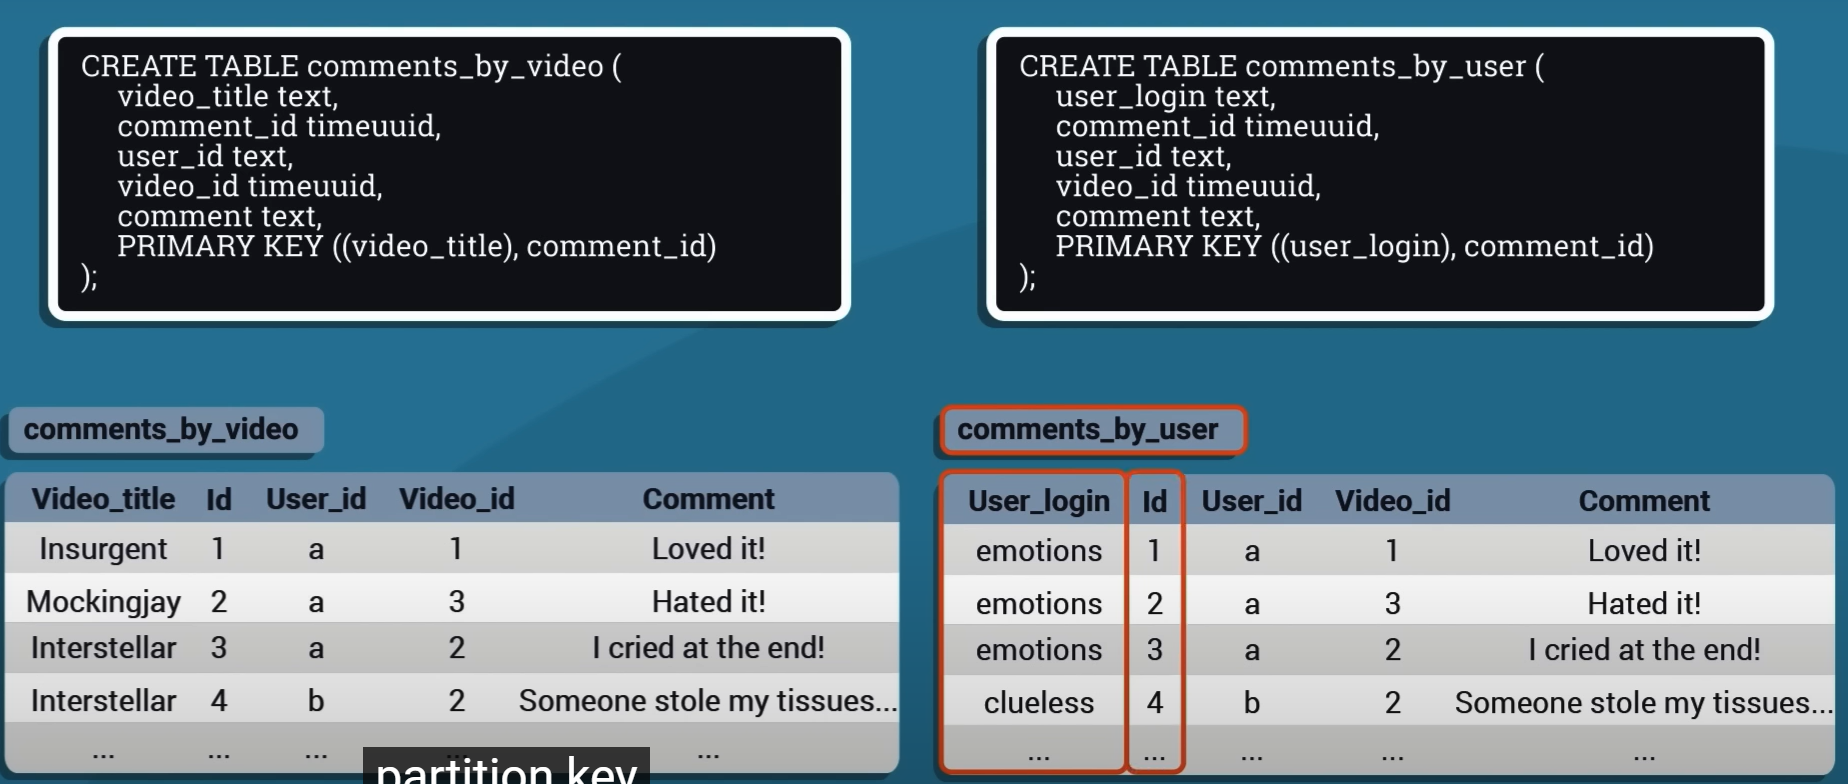         
      
  + referential integrity not enfored
    + joins rely on referential integrity to combine data
    + in RDBMS, the referential integrity means a data in one table must exist in another table in order to join them
      + this means, a value either exists in both table, or none of them to reinforce the integrity for join to operate properly
    + Cassandra does not enforce referential integrity because this requires a read before wirte. It is not considered as an issue that has to be fixed
      + referential integrity can be enforced at application level but that means more work for developers      
      
  + CAP theroem for Cassandra
    + all distributed databases are primarily partition tolerant, and hence there is only the choice between consistency and availability
    + Cassandra is an AP system by default for eventually consistency
    + It can maintain a certain degree of consistency by sacrificing some availability using teh tuned consistency that allow certain number of nodes to agree for particular read or write operation
* Quries are considered as the last step of relational database design, but the application workflow is considered much early in NoSQL database process
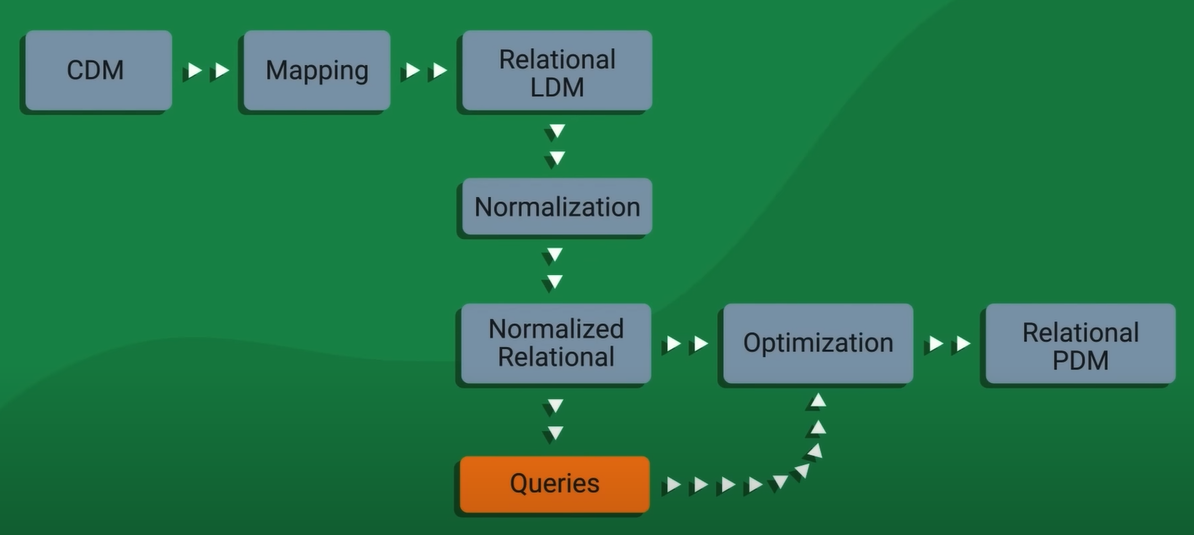
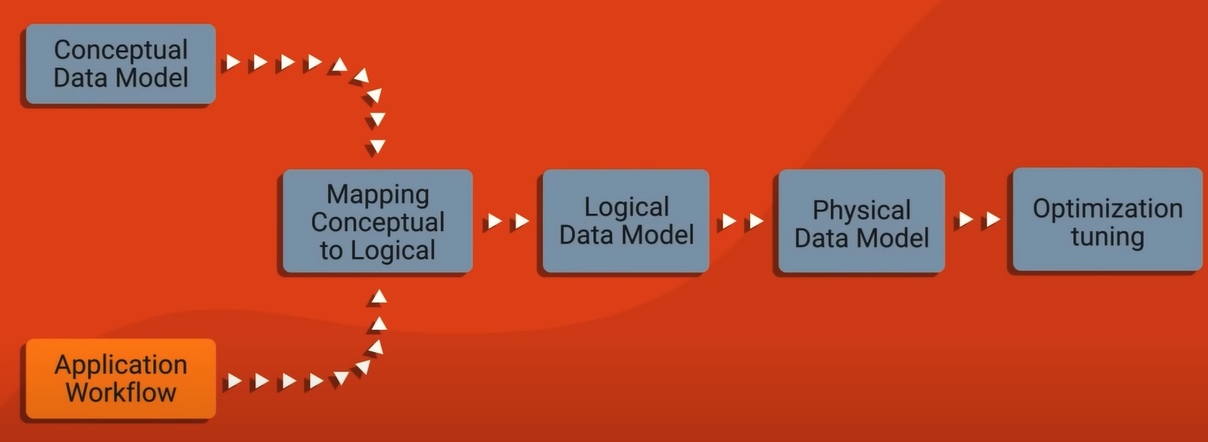


#### Recognize the basic terminologies used in Cassandra tables
* A data model is an abstract model for organizing elements of the data 
  + data models vary depending on the type, capability and purpose of the database
  + For Cassandra, the data model is based on the quries that you may want to perform
* A key space is the outermost logical container of tables
  + it stores tables and replication data. In another word, it is a container for replication 
* A table is a combination of rows and columns, which is contained in the key space
* As a columnar database, Cassandra stores data based on partitions
  + partition is a raw rows of data that are stored on a node in the data table based on the partitioning strategy 
  + Each row in the partition consists of key and value pairs 
  + Cassandra stores and retrieves data based on partitions
  + a partition is the terminology where you can make or break the data model
* Primary key
  + most important part of the data model
  + first to guarantee the uniqueness of the data
  + defines the placement of the record in the cluster that allows for easy access to the data in the model
* partition key
  + the first part of the primary key
  + it determines where in the cluster your data will be stored on which node
  + in the following example, partition key is the left most column indicating which partition (1, 2 or 3) the row will be stored.
* column and rows
  + inside each partition, there are rows and columns
  + columns are stored locally and referred to as cells in the table
  + a row is contained inside a partition
  + there can be more rows and they are stored together on a partition
* clustering column
  + define the order of data within a given partition
  + the default sorting is ascending order  

#### Explore CQL fundamentals
* Cassandra Query Language is known as a NoSQL language
* Building blocks
  + keyspaces
    + top level container to organize related set of tables similar to schema in relational databases
    + defines replication settings: how many copies of a given piece of data are stored within a cluster
    + 
    ```sql
    CREATE KEYSPACE killrvideo
    WITHREPLICATION={'class':'SimpleStrategy','replication_factor':1};
    ```
    + once you create a keyspace in cqlsh, you may select which keyspace you will use for your subsequent command
    + USE switches between keyspaces `USE killrvideo;`   
    
  + tables
    + create tables in the keyspace
    ```sql
    CREATE TABLE table1(
    column1 TEXT,
    column2 TEXT,
    column3 INT,
    PRIMARY KEY (column1)
    );
    CREATE TABLE users (
    user_id UUID,
    first_name TEXT,
    last_name TEXT,
    PRIMARY KEY (user_id)
    );
    ```
  + primary keys
    + each keyspace has a table inside it
    + primary key clause is a unique identification for each row
    + primary key is used to uniquely identify rows
    + In the code example above, user_id is a partition key, which is not enough to guarantee uniqueness. You need the PRIMARY KEY clause to ensure the uniqueness
* Basic CQL commands
  + SOURCE
    + allows you to execute a set of CQL statements from a file
    + the file name must be enclosed in single quotes
    ```sql
    SOURCE './myscript.cql';
    ```
    + calsh will output the results of each command sequentially as it executes
  + ALTER TABLE
    + what can you alter in a table?
    + change datatypes of column
    + add columns
    + drop columns
    + rename columns
    + change table properties
    + can not change the primary key columns
    ```sql
    ALTER TABLE table1 ADD another_column text;
    ALTER TABLE table1 DROP another_column;
    ```
    
  + TRUNCATE
    + removes data from a table
    + should be used carefully
    + data once removed can be restored from backup
    + sends a JMX command to all nodes
    + command fails if any node is down
  + SELECT
    + used to pull data from a table
    + all the rows of a table can be selected using asterisk notation
    + cassandra supports a paging mechanism by specifying the column names to select
    + cassandra also supports a couple of built-in aggregation functions
    ```sql
    SELECT * FROM table1;
    SELECT column1, column2, column3 from table1;
    SELECT * FROM table1 LIMIT 10;
    SELECT COUNT(*) FROM table1
    ```

#### Identify how partitions, primary keys, and clustering columns are used in Cassandra tables
* Partitioning concepts
  + Partitions give an indication of where your data is in your data model and in the cluster
* partitions
* partition keys
  + partition keys must present in cassandra queries in where clause
  + the following queries valid in a relational context are invalid in cassandra due to the absence of partition keys, as join is not supported in cassandra
  ```sql
  select * from videos where title="cat"
  select * from videos where added_date < '2015-05-01';
  ```
  
* composite partition keys
* clustering columns

#### Observe the concept of replication and consisency

### Cassandra building blocks

#### explore the concept of denormalization
* the following are three tables that used by RDBMS to join together for queries
  + join command combines the information in one table using the join columns specified
  + the results are then filtered from the merged table
```sql
SELECT comment
FROM videos 
JOIN comments
 on videos.id = comments.video_id
 WHERE title = 'Interstellar'
 ```
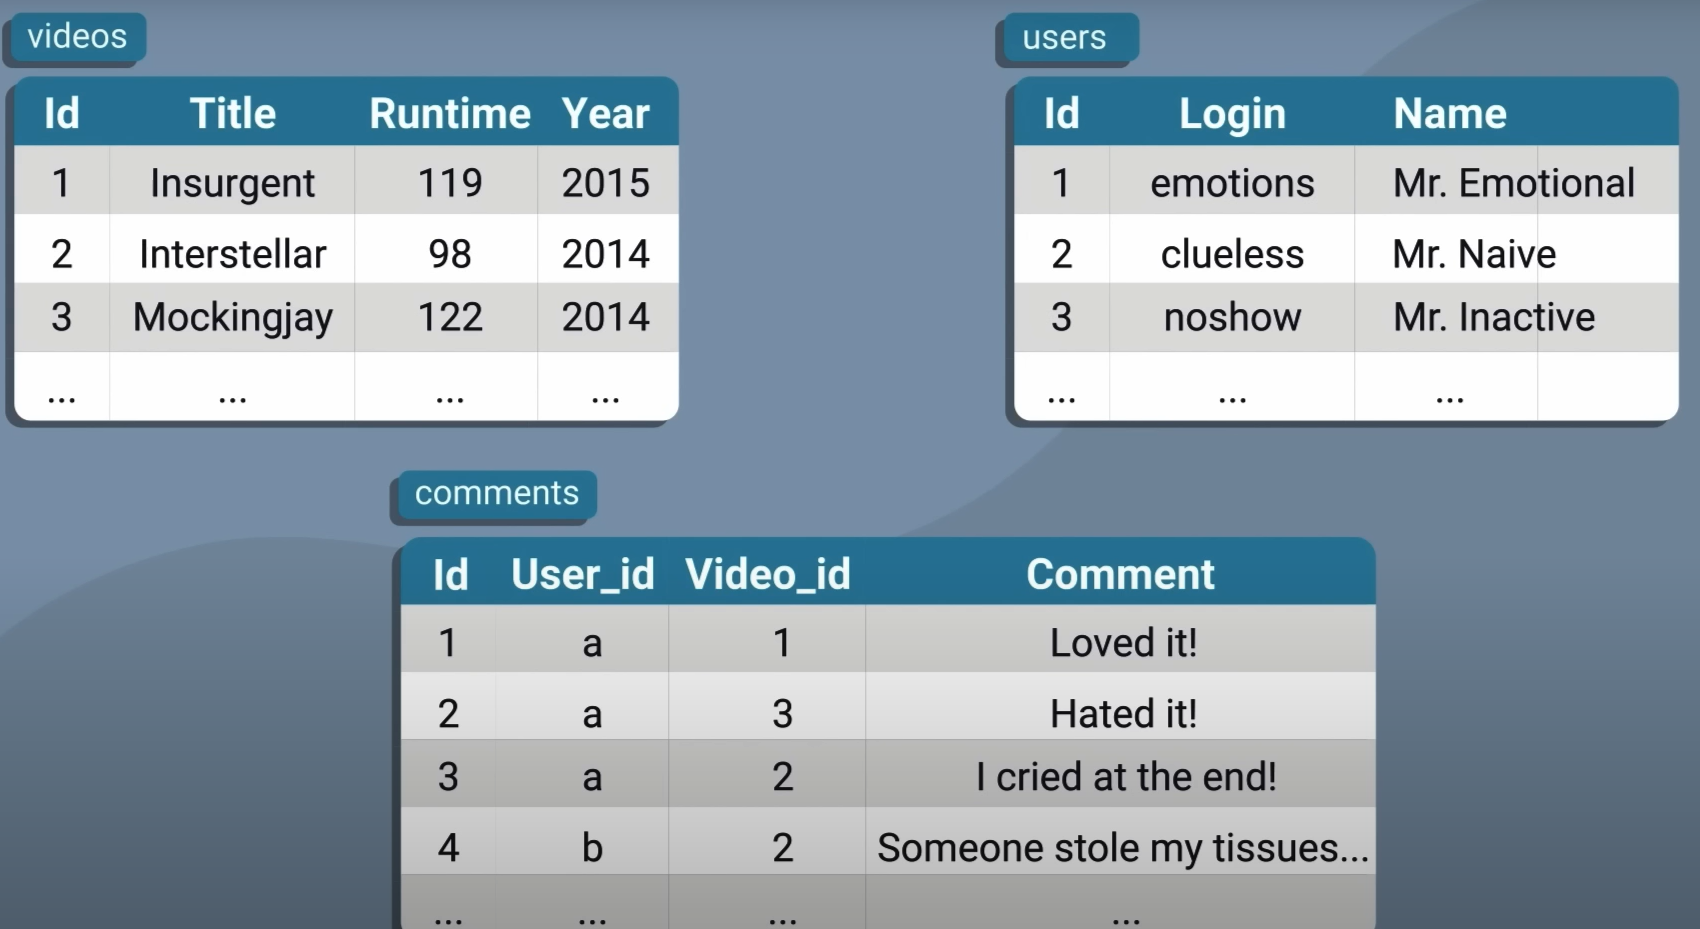

* the following are two cassandra tables, comments_by_video and comments_by_user
  + the comments column is duplicated in both tables
  + the tables have different primary keys. 
    + in comments_by_video, video title is the partition key and comment id is the clustering column
    + in comments_by_user, user_id is the partition key and comment id is the clustering column
    
  
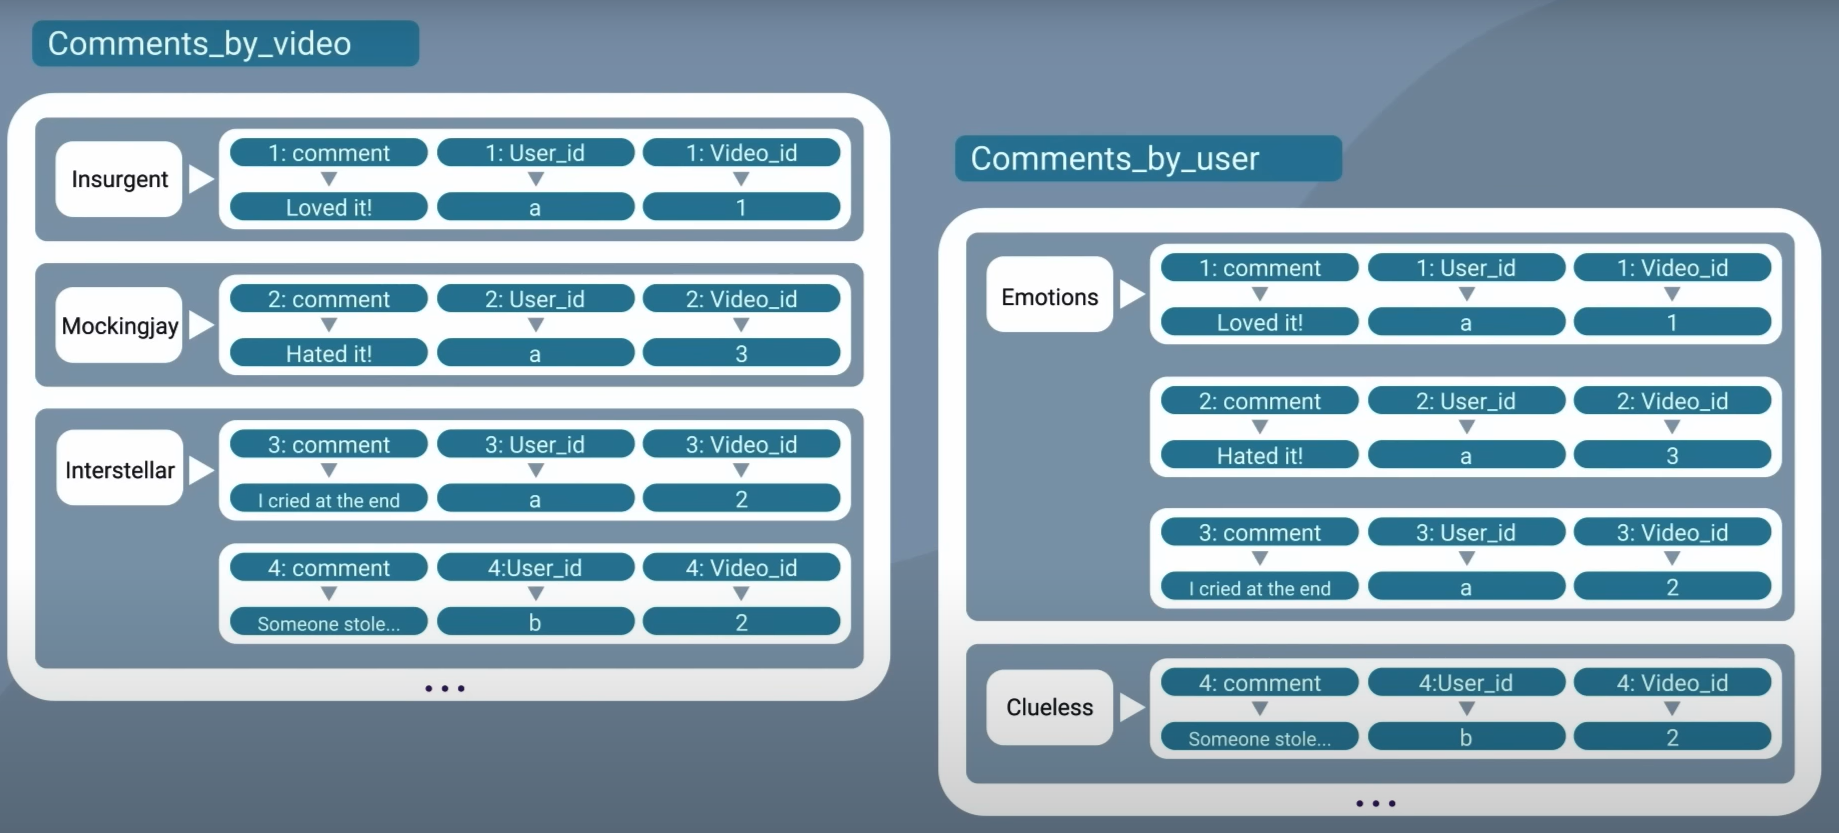


#### investigate collection, counters, and User Defined Types
* flexible data types in cassandra for efficiency, which 
  + simplify table design
  + optimize table functionality
  + store data more efficiently
  + might change table designs completely
* these data types include  
  + collections
    + cassandra provides collections to group and store data together in a single column
      + this is to support the one to many relationship. For example, using a email collection to store the multiple email addresses of a user
      + in RDBMS, this is done by one to many relationships by joining two tables e.g. user and email table using the user id as the PK and FK of the two tables
    + collection columns are multi-valued columns
      + max number of elements in each collection is 64000 which in practice can be dozens or hundreds  
    + it is designed to store a small amount of data and retrieved in its entirety
      + max size of an element is 64kb which in practice is much smaller than the number of elements in collection
    + can not be a part of primary key, partition key or clustering column
    + can not nest a collection inside of another collection unless you use FROZEN keyword
    + three types of collections
      + SET
        + stores the typed collection of unique values
        + stored unordered but returned in storted order
        + code example
          + note that we define the data type of the elements in set collection using angle brackets
        ```sql
        CREATE TABLE users (
        id text PRIMARY KEY,
        fname text,
        lname text,
        email set<text>
        );
        
        INSERT INTO users (id, fname, lname, emails)
        VALUES ('cass123', 'Cassandra', 'Dev', {'cas@dev.com', 'cassd@gmail.net'}
        );
        ```
      + LIST
        + groups and stores values in a single cell
        + there can be duplicates
        + elements stored in particular order and retrieved according to an index
        + code example
        ```sql
        ALTER TABLE user ADD freq_dest list<text>;
        
        UPDATE user SET freq dest = ('Berlin', 'London', 'Pairs')
        WHERE id ='cass123';
        ```
      + MAP
        + allows you to relate values to one another based on key-value pairs
        + elements ordered by unique keys
        + use the SET command to enter the values
        + code example
        
        ```sql
            ALTER TABLE users ADD todo= map<timestamp, text>;

            UPDATE users SET todo = {
            '2018-1-1': 'create databse'
            '2018-1-2': 'load data and test'
            '2018-2-1': 'move to production'}
            WHERE id = 'cass123'
        
        ```
        + You can update a record in a Map by using the UPDATE command. The UPDATE command writes one or more column values to a row in a Cassandra table. Like INSERT, UPDATE is an upsert operation: if the specified row does not exist, the command creates it1.

          + Here’s an example of how you can update a value in a map column by appending an element to the map by enclosing the key-value pair in curly brackets and using the addition (+) operator:
      ```sql
      
            UPDATE cycling.cyclist_teams SET teams = teams + 
            {2009 : 'DSB Bank - Nederland bloeit'} WHERE id = 5b6962dd;    
       ```
                   
      + FROZEN
        + used for nest datatypes to nest a collection inside another collection
        + serialize multiple components into a single value
        + values in a FROZEN collection are treated like blobs
          + frozen will turn the value into a blob
        + non-frozen types allow updates to individual fields
          + if you want to update fields in a collection, you can't use frozen keyword
  + counters
    + column that can store a 64-bit singed integer
    + could be incremented or decremented and values are changed using updata command
      + we change the value by Update and Set commonad
    + need specially dedicated tables
      + can only have primary key and counter columns
      + can lead to duplicate data in multiple tables
    + you can have more than one counter columns in a table
    ```sql
        CREATE TABLE moo_counts (
        cow_name text,
        moo_count counter,
        PRIMARY KEY(cow_name)
        );

        UPDATE moo-counts
        SET moo_count = moon_count + 8
        WHERE cow_name = 'Bestsy'
    ```
  + user defined types
    + UDTs group together related fields of information
      + group similar fields that are both named and typed
    + can include any support data types, including other collections and UDTs
    + can attach multiple data fields, each named and typed to a single column
    + allow embedding more complex data within a single column
    + code examples of UDTs
      + the code demonstrate to store the conmbined column with one to many relationship in a denormalized table rather than having to join tables in RDBMS
      + note that we need to use 'frozen' key value to treat the UDT as a single value, and we will not be able to update the individual fields in UDT. We can only update the UDT as a whole, as shown in the following code example
    ```sql
        CREATE TYPE address (
        street text,
        city text,
        zip code int,
        phones set<text>
        );

        CREATE TYPE full name (
        first name text,
        last name text
        );

        CREATE TABLE users (id uuid, 
        name frozen <full name>,
        direct reports set <frozen <full_name>>,
        addresses map<text, frozen<address>>,
        PRIMARY KEY((id))
        );
    ```
    
    + an example of inserting data for UDT type
    
    ```sql
    -- Create a UDT called address
    CREATE TYPE address (
      street text,
      city text,
      state text,
      zip_code int
    );

    -- Create a table called users with an address column of type address
    CREATE TABLE users (
      user_id int PRIMARY KEY,
      name text,
      address frozen<address>
    );

    -- Insert data into the users table
    INSERT INTO users (user_id, name, address)
    VALUES (1, 'Alice', {street: '123 Main St', city: 'Springfield', state: 'IL', zip_code: 62704});
    
    - Update the entire address value for user 1
UPDATE users SET address = {street: '456 Elm St', city: 'Springfield', state: 'IL', zip_code: 62704} WHERE user_id = 1;
    ```


### Data Modeling
#### Conceptual Data Model
* conceptual data model is responsible for determining the attributes of all objects in your domain and analyzing how they are related  
  + identify what type of data is contained in the model
    + understand your data and extrapolate essential objects and constraints that the data types would additionally require
  + defines what a model should contain, for example, entities such as users, comments, videos and ratings
  + it is important to capture different views of model while conceptualizing your data model so that our solutions directly serve our business' needs
    + collaboration with other departments and experts is the key
    + The process to involve technical and non-technical members to share, review and agree is critical for conceptual data model
* conceptual data model is 
  + an abstract view of your domain. 
  + independent of any technology. 
  + does not specify which database system to use
  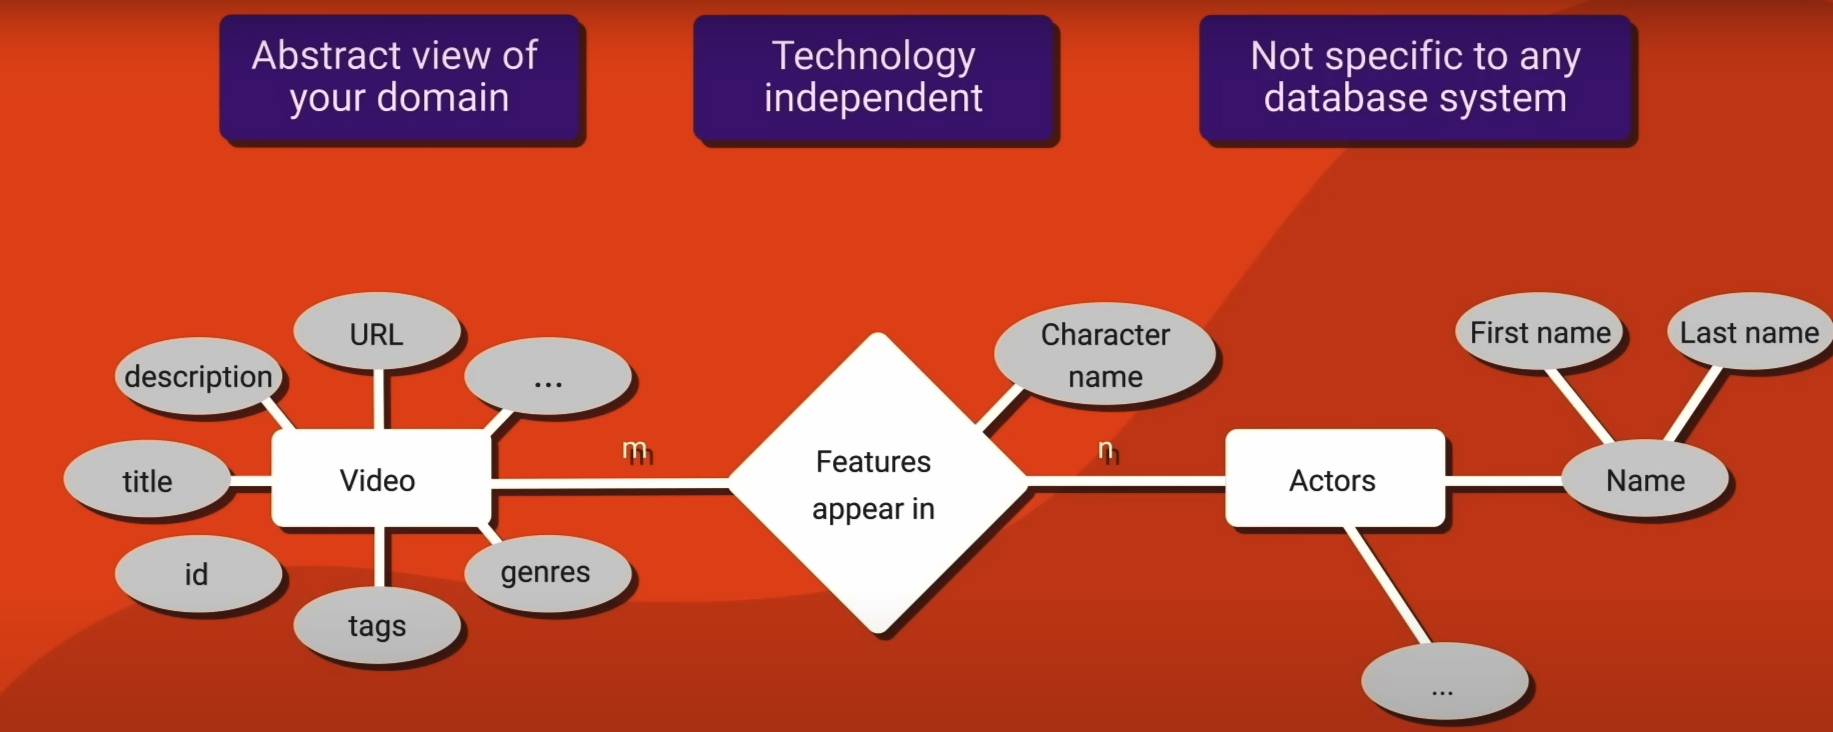
* Cardinality and attribute keys
  + cardinality defines relationships between two entities in a given data model
    + how many instances of an entity is related to how many of another
    + tells how many times an entity can participate in the relationship
  + fields are used to store properties about an entity or relationship
  + key attribute such as Id uniquely identifies an entity
* ER model
  + entity types
    + different entities such as videos and actors
    + weak entity types are entities that can not exist without a corresponding strong entity on the other side
      + in the following ERD, encoding is a weak entity depending oin the stron entity of video
      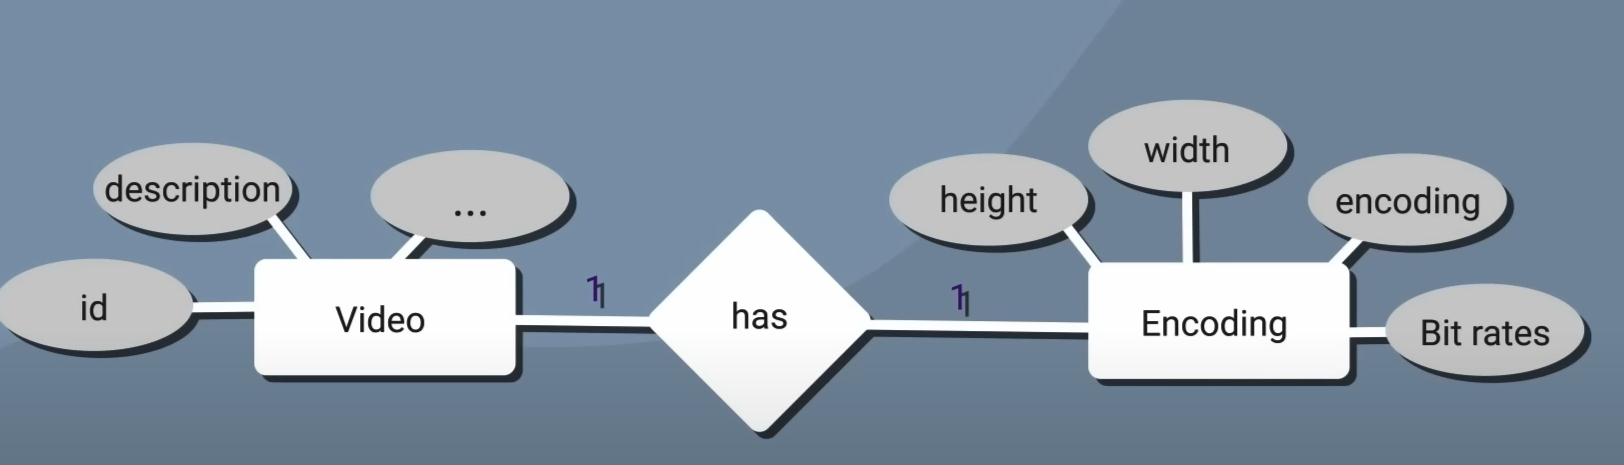
      
  + relationship types
    + defines the relationship between entities (Features in in the diagram)
  + attribute types
    + different attributes such as first name and last name of an actor entity
  + attributes
    + stored in mutilple values per attribute
* relationship keys
  + one to one key
  + one to many key
  + many to many key
  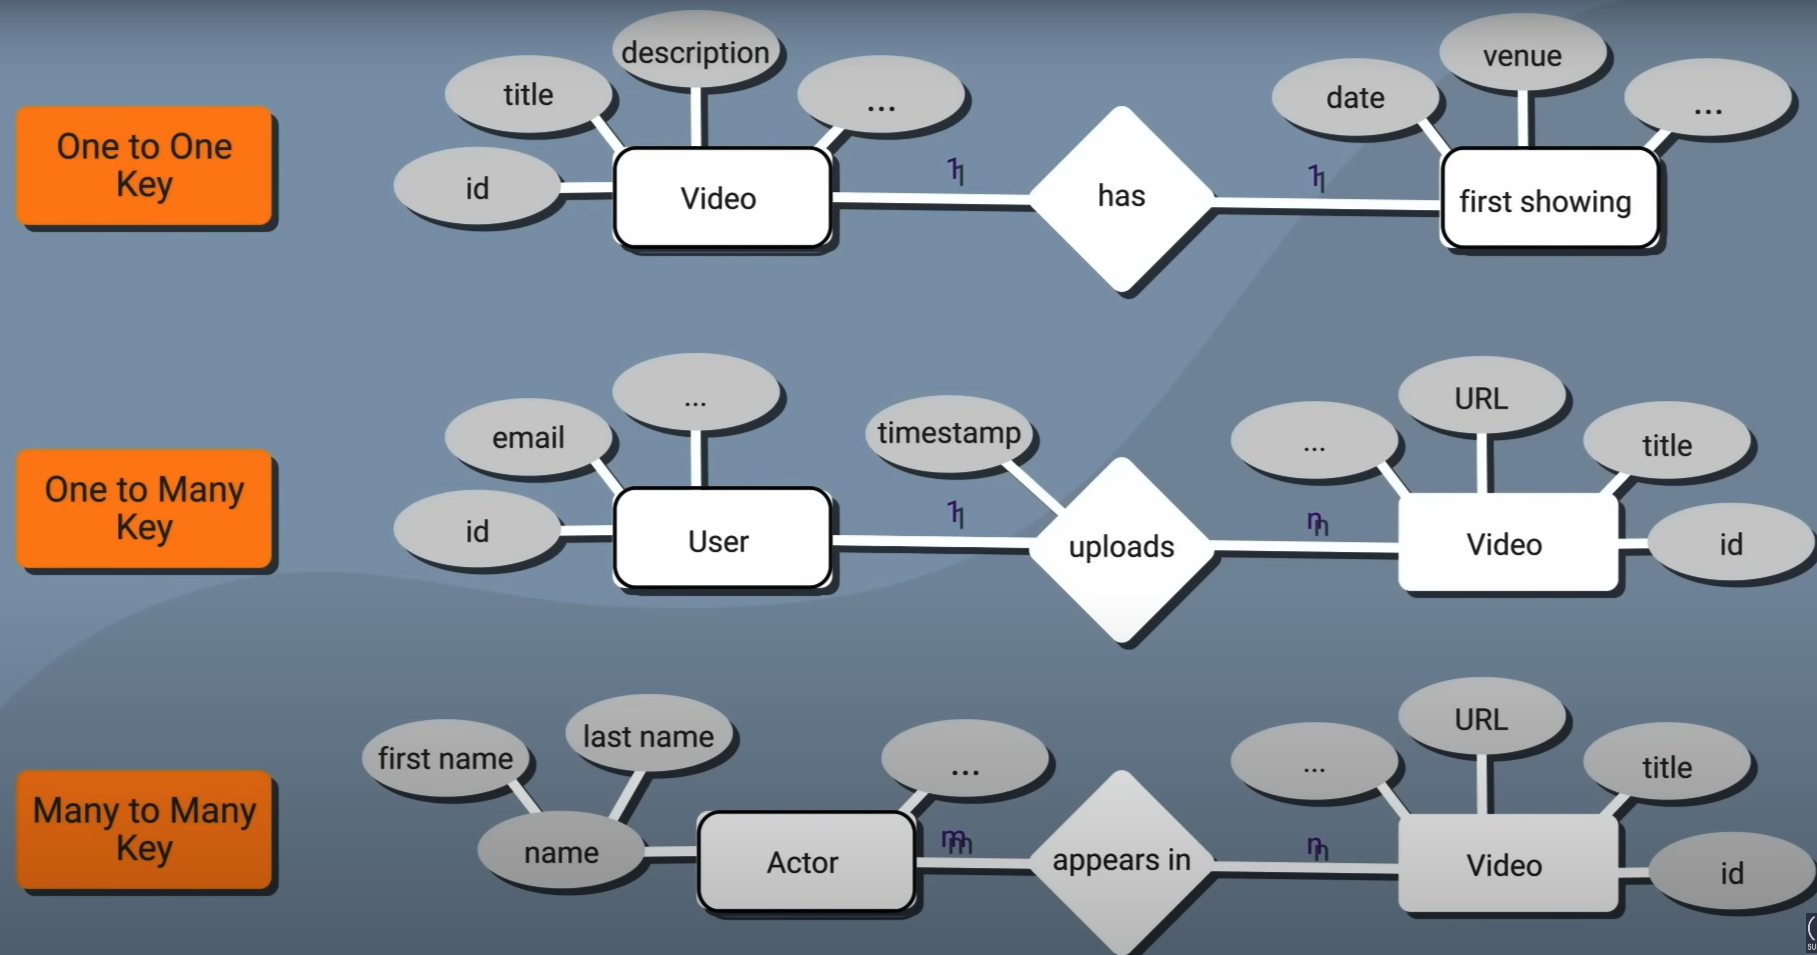
  
#### workflow and access patterns
* application workflow
  + how users will navigate through the application
  + also determin which queries will perform against an apache cassandra database
  + each application has a workflow - tasks/causal dependencies from a graph
  + access patterns help determine
    + how data is accessed
    + what queries to run first
* an example of application workflow
  + when a user login a website
    + what are they going to click?
    + what data are they going to use?
    + what data are they going to read?
    + how will the user go through the application?
* find the access patterns: the following are information a user will query during the journey of visiting a web site when starting with logging into a site, as shown in the diagram
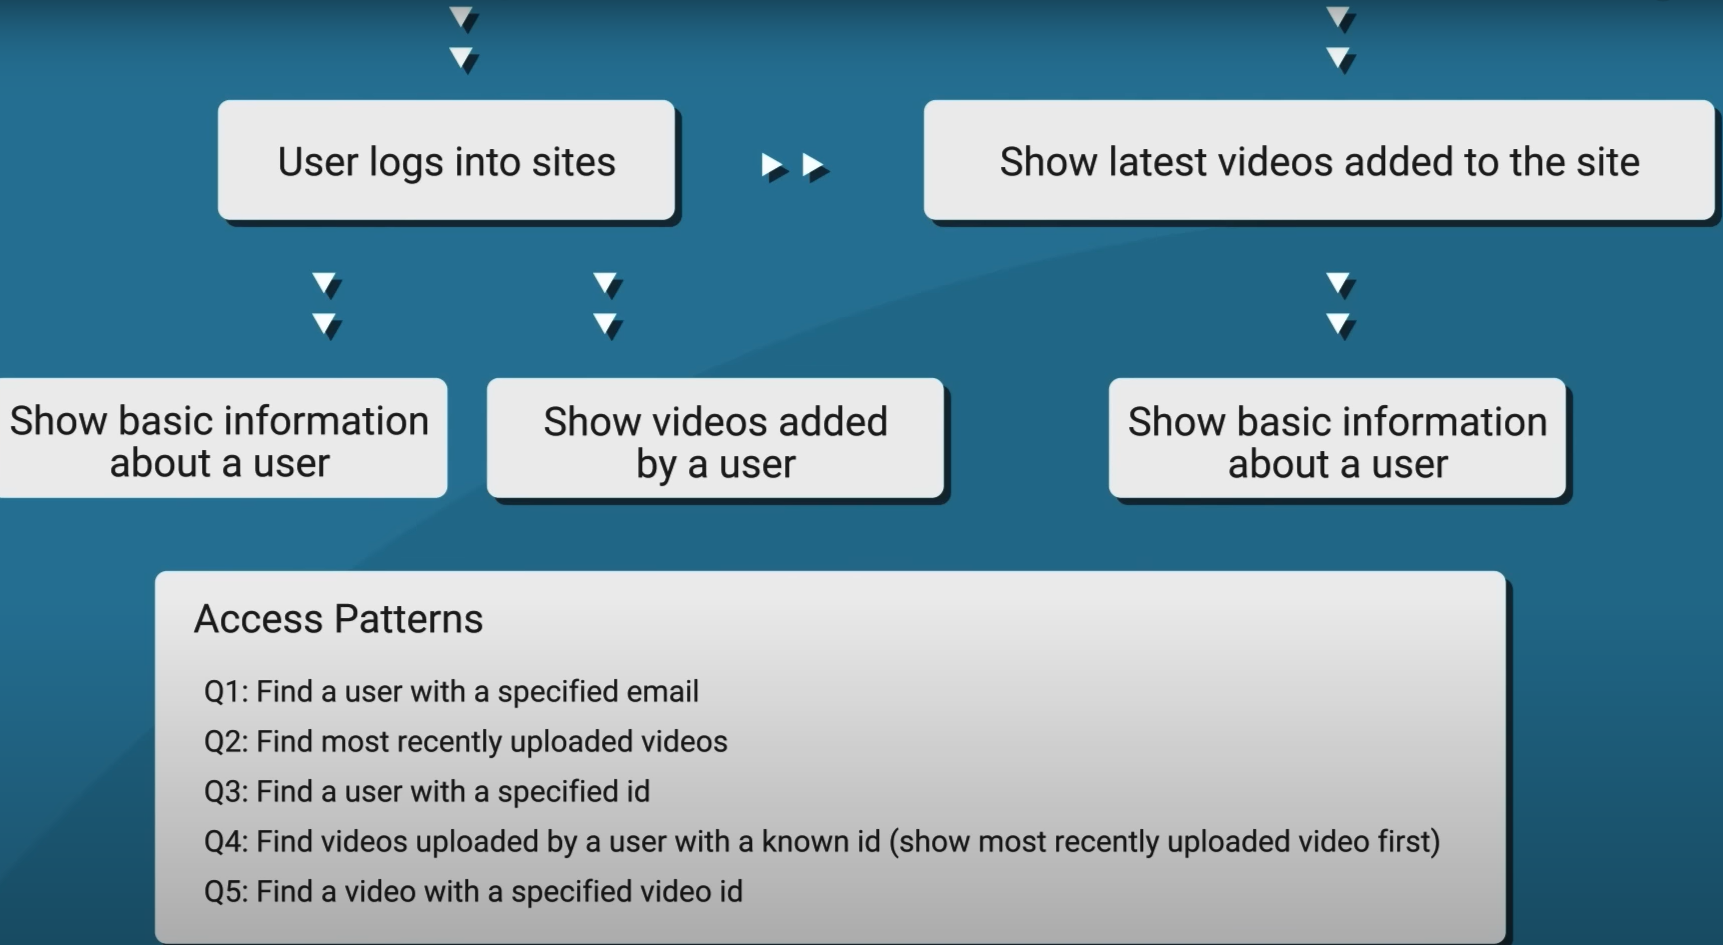
  + find a user with a specified email
  + find most recently uploaded videos
  + find a user with a specified id
  + find videos uploaded by a user with a known id (show most recently uploaded video first)
  + find a video with a specified video id
    

#### Mapping and conceptual model
* starting from defined conceptual data model and application workflow, the next step is mapping conceptual model to a lotical model by some basic rules for query driven methodology
* mapping rules
  + ensue that a logical data model is correct
  + each query has a corresponding table
  + tables are designed to allow queries to execute properly
  + the tables return data in the correct order
* 5 mapping rules to guide the query driven transition 
  + rule 1: identify entities and their relationships
  + rule 2: identify the equality search attributes
  + rule 3: identify the inequality search attributes
  + rule 4: identify the ordering attributes
  + rule 5: identify the key attributes
* generate logical data model
  + create a table schema from the conceptual data model for each query and applies mapping rules in order for this schema
  + the digram shows the example of the query to find the most recently uploaded videos by users 
    + the ERD describes a join table that join the two entities, user and Video by the uploads relationship with the column of timestamp in the relationship.
    + note that the table videos\_by\_user is denormalized and different from a typical join table in relational databases. In addition to user_id and video_id, extra attributes of videos and user are also included in the table
    + rule 1 defines the schema of the table
    + rule 2 identifies the user id as the equality search attribute (uploaded by whom)
    + rule 3 identifies timestamp as the inequality search attribute (most recent)
    + rule 4 ordering attributes (None)
    + rule 5 key atribute that guarantee uniqueness and minimality (video id)
  + the following diagram shows the propcess of generating logical data model where ERD and access patterns are obtained from conceptual data model and access pattern from app work flow, respectively
  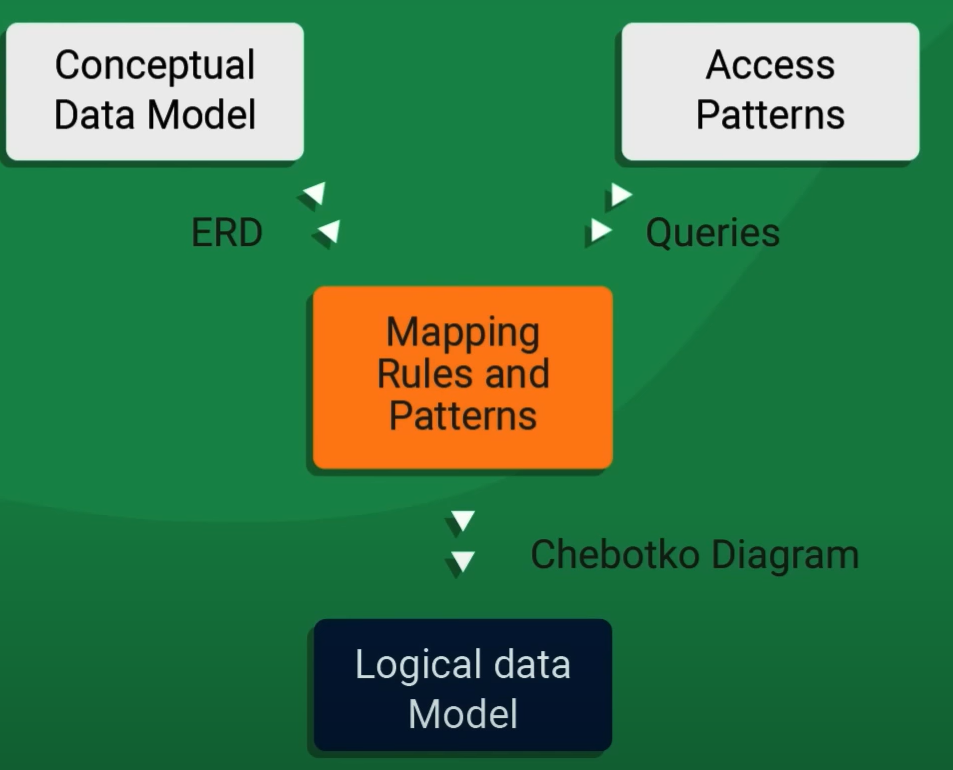
  
* chboko model
  + graphical representation of distribution cassandra databse schema design
  + we have table diagrams, each corresponds to a query, 
    + the UDT table is only lack of primary keys
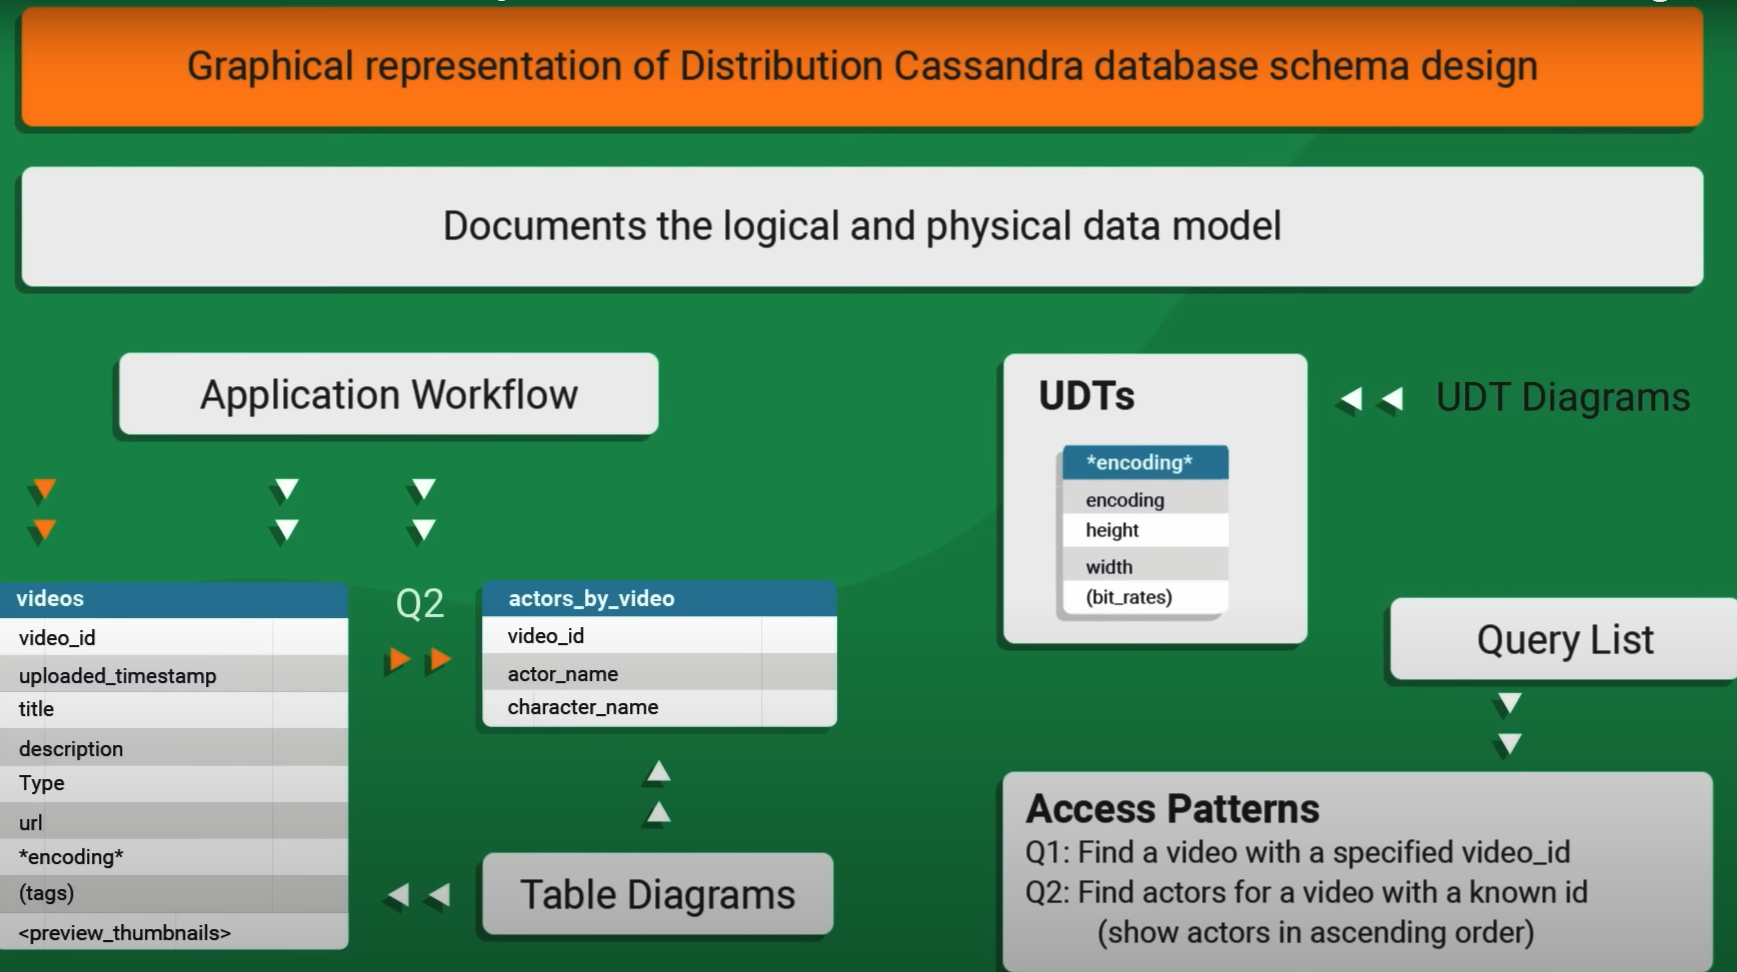
  + on logical level the cheboko diagram shows the column names and properties
  + on physical level, the Cheboko diagram shows column data type
  + to move from logical to physical tables, we need to add column data type followed by a bit of optimization if needed
  + the following diagram shows a logical table with notations of CQL Type (left) and the column types in the physical table (right)
  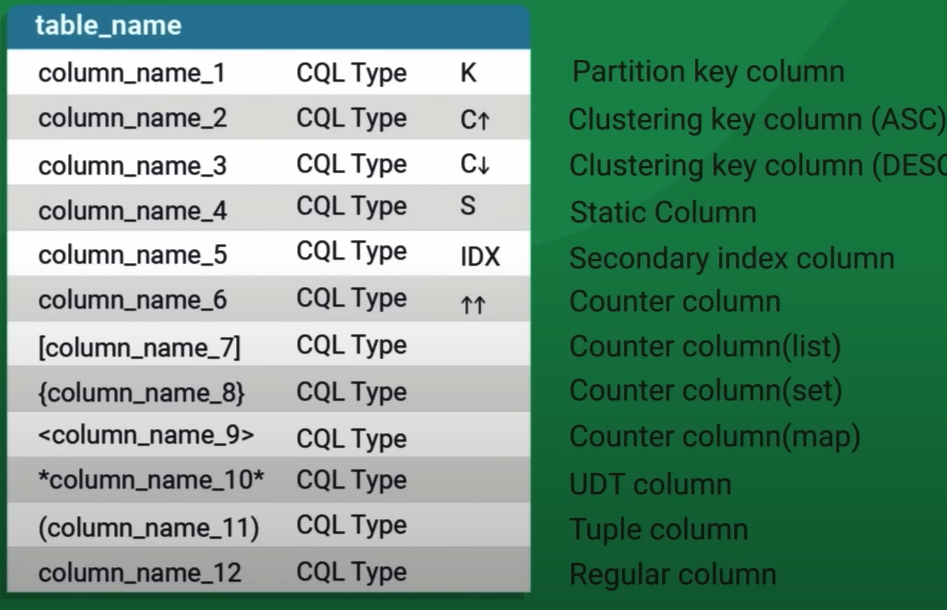
  
* UDT
  + UDT is a datatype and UDTs can be nested within one another
  + the following is a diagram showing the UDT column data type in physcial tables and how UDTs are used in videos and actors\_by\_video table
  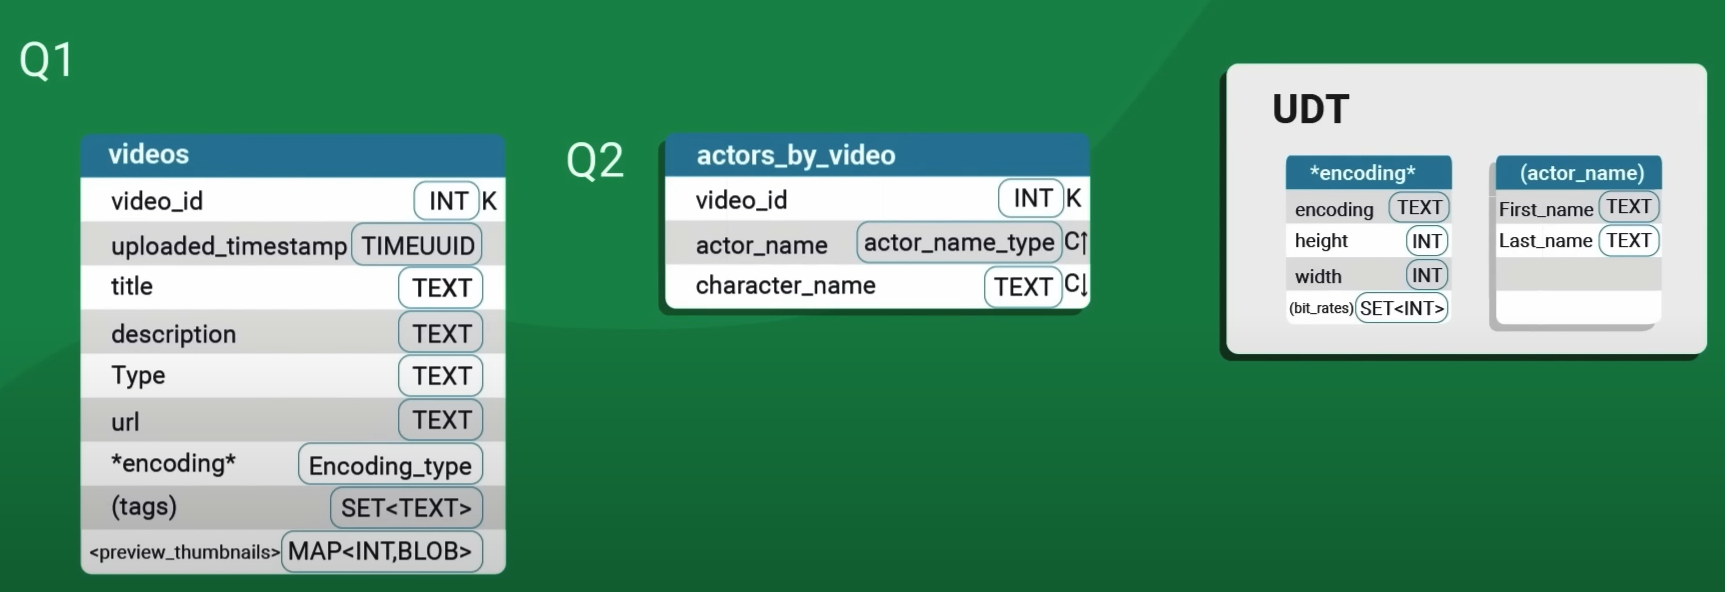
  
* example of physical tables with column names and data types
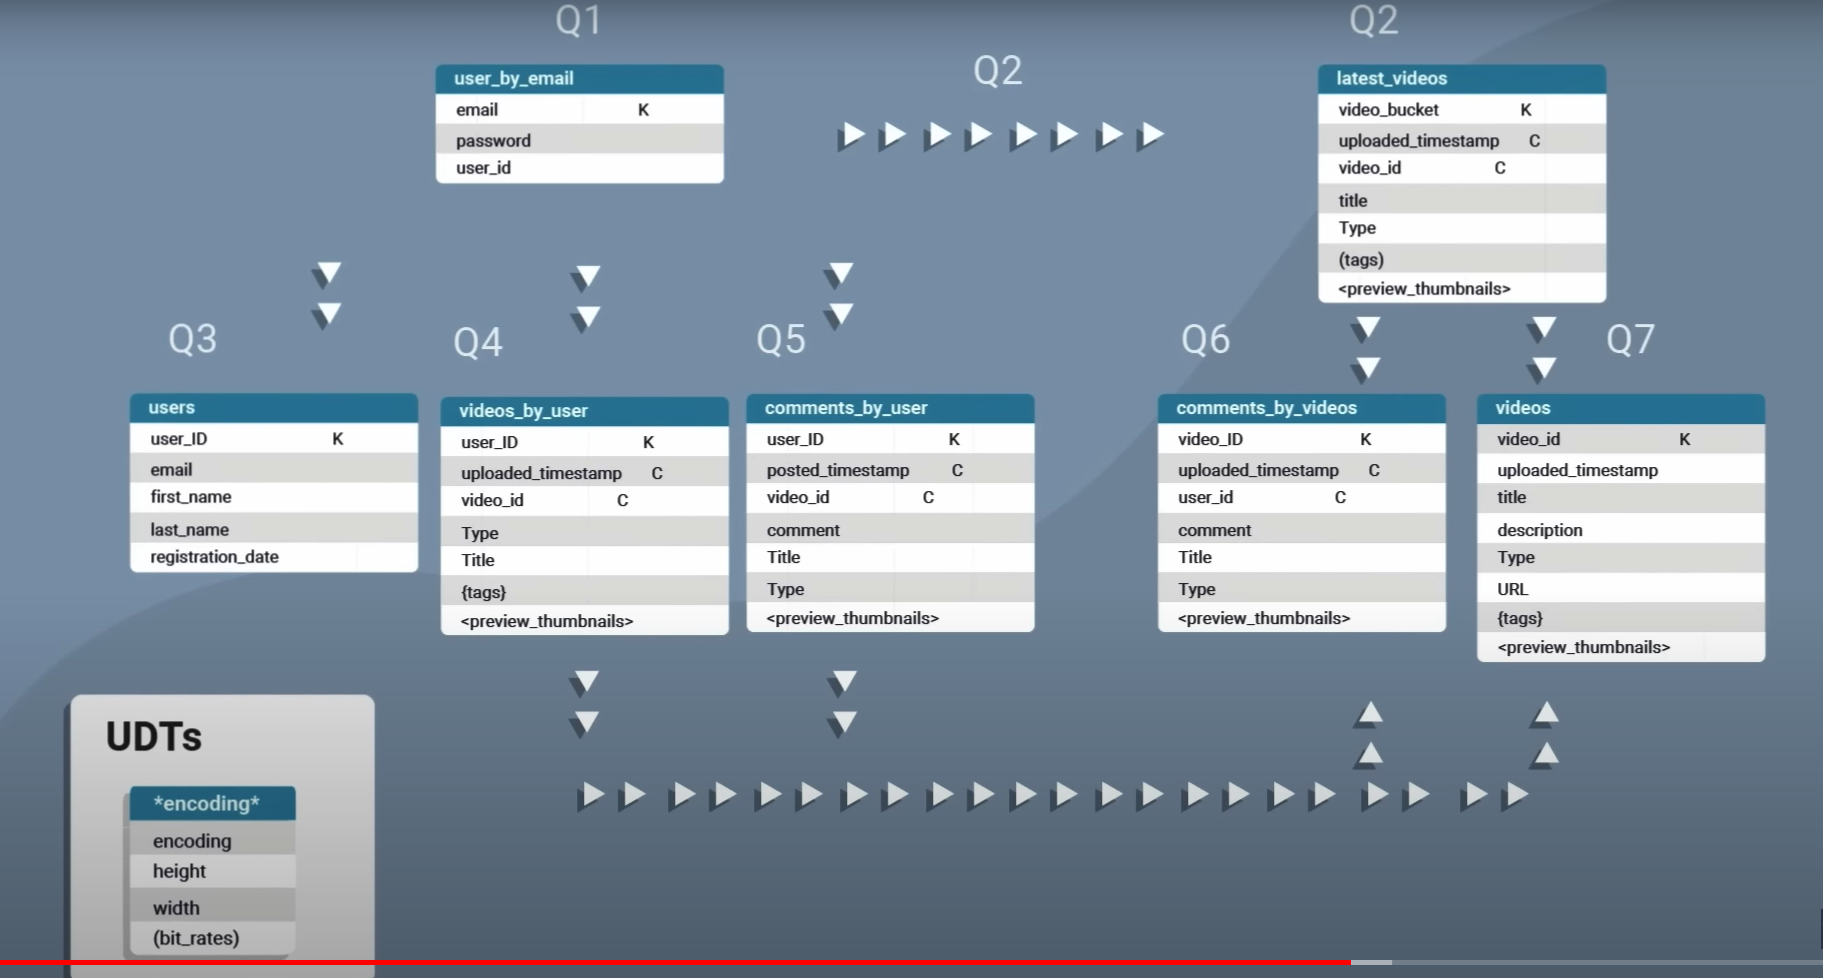

* 4 principles of cassandra data modeling 
  + know your data
    + key to successful implementation of database
    + helps to preserve properties so that data is organized correctly
    + in Cassandra, space is sacrified to reduce time and organizing data is critical
    + once we define what is stored in database, we move on to create a database
    + understanding primary key 
      + entity and relationship keys affect the table primary keys
      + primary key uniquely identifies a row / entity / relationship
    + cardinatlity constraints helps to define partitions and relationship cardinality helps in satisfying the queries     
      
  + know your queries
    + queries are captured by application workflow models
    + reduce the number of partitions that have to be read for a query result
      + signle partition per query is the most efficient access pattern
      + entities in cassandra are designed in such a way that queries can generate the results with the minimum number of reads
      + ideally, each query can generate results from a single partitioned search
      + partition can be single row or multi-row, respectively
      + if we want to query from a particular partition, we can give the partition key where the node having that partition can directly retrieve the data without additional filtering or searching the entire cluster required 
      + accessing multiple partitions for a query access pattern is less efficient but not necessarily bad, as long as these kind of queries are limited in number
      + the strict anti-pattern that has to be avoided at all cost is to perform a linear search through all partitions in a table(s) to retrieve results. Since partitions are reside on different nodes, traversing all the nodes beats the benefits of horizontal scaling.  
    + table schema design changes if queries are changed
  + nest data
    + the working rule with Cassandra is to group as much data as possible on disk
    + this grouping of data is referred to as nesing of data, which is the main data modeling technique for a cassandra data model
    + nesting organizs multiple entities into a single partition
    + supports partition per query during data access
    + query is inmportant as schema design should be driven by this application queries
    + three data nesting mechanisms
      + clustering columns
        + primary data nesting mechanism
        + data are partitioned by partition key, and nested sorted by clustering columns. Here the partition key and clustering column(s) are combined to form the primary key
        + partition key identifies an entity that other entities will nest into
        + values in a clustering column identify the nested entities
        + multiple clustering columns implement multi-level nesting
      + collection columns
      + UDT columns
        + secondary data nesting mechanism
        + represent one to one relationship, but can use in conjunction with collections
        + easier then working with multiple collection columns
        + for example 
          + we can define a video_type with all the attributes of a video, such as title, description, id, type, url as a UDT
          + we then in actors_by_video, define a collection column called 'videos' with the video_type as element type
          + this will retreive all videos of a user by user id
  + duplicate data
    + partition per query and data nesting may result in data duplication
    + Cassandra join on write instead of join on read
      + instead of joining tables for read, Cassandra take the data and directly return the results to users
      + This means data will be duplicated in different tables and partitions. As shown in the following diagrame, when write a new video, a video record will be repeatedly written to the three tables that provide the different access pattern to retrieve videos by actor, genre and tag
      + 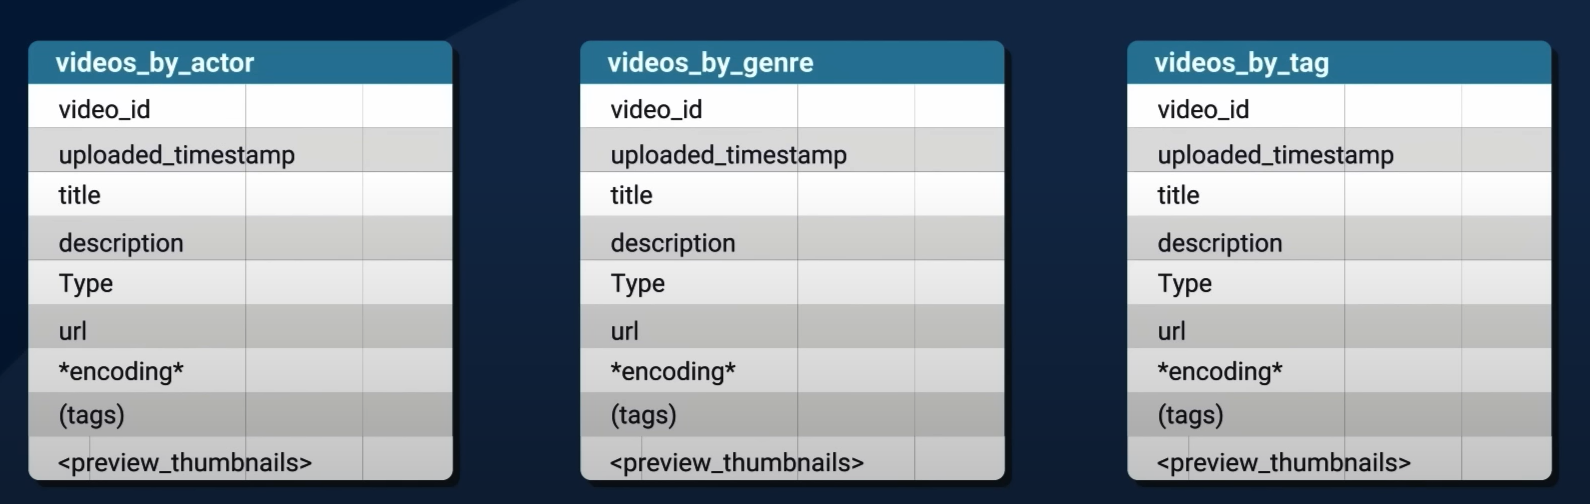  
  
  

#### Physical data model
* Add data types to each column of logical data model to make it physical model. In addition,
  + optimize efficiency
  + ensure the partition size won't grow too much
  + ensure the query results can be returned quickly
* the following diagram is a comparison of logical and physical models of comment_by_user table 
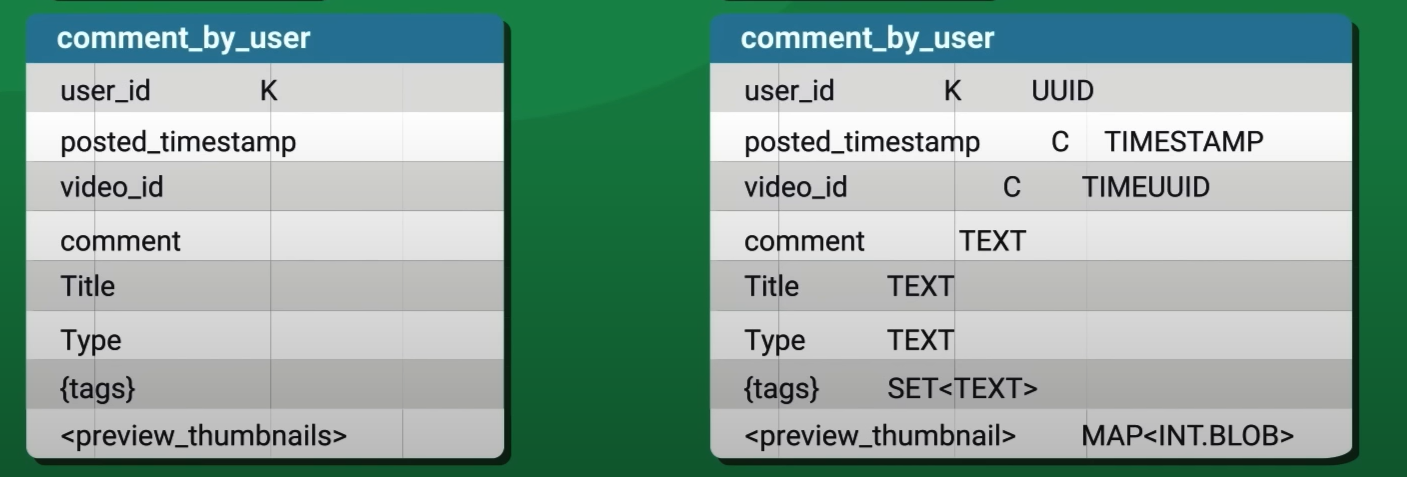

* Creating a table from physical data model
  + creating a table could cause a lot of problems if the tables aren't configured correctly
    + the first challeng is to make the patition too large
  ```sql
  CREATE TABLE comments_by_user (
      user_id UUID,
      posted_timestamp TIMESTAMP,
      video_id TIMEUUID,
      comment TEXT,
      title TEXT,
      type TEXT,
      tags SET<TEXT>,
      preview_thumbnails MAP<INT, BLOB>,
      PRIMARY KEY((user_id), posted_timestamp, video_id)
      ) WITH CLUSTERING ORDER BY (posted_timestamp DESC, video_id ASC);
   ```   
* to migrate an existing table to a newly created table, you can use
  + COPY command from cql that allows the copy of up to 2 million values
  + SSTable Loader to migrate data from one cluster to another
  + Spark for data loader that doesn'r require the knowledge of Spark
  
* basic CQLCOPY features
  + COPY TO, exports data from a table to a csv file
  + COPY FROM, imports data to a table from a csv file
  + the process of CQLCOPY verifies teh PRIMARY KEY and updates existing records
  + if HEADER is false, it specified that the fields are imported in deterministic order
  + When column names are specified, fields are imported in that order
    + if any field is missing or empty, it set it's value to null
  + Source cannot have more fields than the target table -- can have fewer fields
  + code example
  `COPY table1 (column1, column2, column3) FROM 'tabledata.csv' WITH HEADER=true;`
 
 * advanced data modeling
   + https://astra.dev/3xX5QK7
 * introduction to machine learning with Cassandra and Spark
   + https://astra.dev/39aPqU5
 * use REST API wit Astra DB, react and NodeJSe
   + https://astra.dev/3rNnOL5
 * build a Reactive app in cassandra with spring
   + https://astra.dev/3xSxaZW  
 * stargate spring microservice
   + https://astra.dev/3vlUwyx
   + stargate.io